In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice, rand
from timeit import default_timer as timer
import copy
from itertools import groupby
import sys
import pandas as pd
from collections import defaultdict
from random import choice
from fractions import Fraction

In [7]:
#ex1:
#define transaction matrix
L = np.array([[0, 2/5, 1/5, 0, 0],
                [0, 0, 3/4, 1/4, 0],
                [1/2, 0, 0, 1/2, 0],
                [0, 0, 1/3, 0, 2/3],
                [0, 1/3, 0, 1/3, 0]])


In [8]:
#in order to simulate the particle moving in the graph we have to compute the transiction matrix P that describes the
#probability of moving to another node while being in a certain node
w = np.sum(L, axis=1)
w_star = np.max(w)
D = np.diag(w)
P = np.linalg.inv(D) @ L
#we define the possible state of the matrix corrisponding to every node [0,1,2,3,4]
nstates = len(L[0])
#number of possible movement of the particle
n_steps = 100000

6.751631115148278


Text(0.5, 1.0, 'Trajectory for the first 20 jumps')

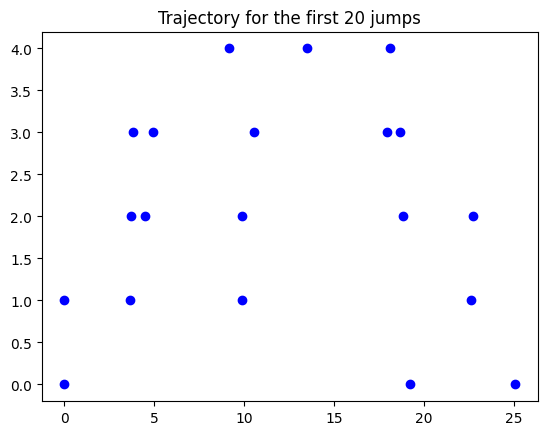

In [9]:
#we initalize the variable used to keep track of the particle movements as well as when it occurs
pos = np.zeros(n_steps, dtype=int)
transition_times = np.zeros(n_steps)
#we define the time of the next movement
t_next = -np.log(np.random.rand())/w[0]
pos[0] = 1
#let's define some memory variables
time_to_a = 0
n_times_in_a = 0
for i in range(2,n_steps):
    #choose the next state randomly according to P
    pos[i] = np.random.choice(nstates, p=P[pos[i-1],:])
    #save total time elapsed from the start of the simulation
    transition_times[i] = transition_times[i-1] + t_next
    t_next = -np.log(np.random.rand())/w[pos[i]]
    #if the particle goes back to state a saves time and increase the number of time the
    #particle returned to a
    if pos[i] == 1:
        n_times_in_a += 1
        time_to_a = transition_times[i]

average_time = time_to_a/n_times_in_a
print(average_time)


plt.plot(transition_times[0:20], pos[0:20], 'bo')
plt.title('Trajectory for the first 20 jumps')

In [10]:
#first of all we need to compute pi_bar, the stationary distribution of the jump chain
w = np.sum(L, axis=1)
w_star = np.max(w)
Q = L/w_star
Q = Q + np.diag(np.ones(len(w))-np.sum(Q,axis=1))

# compute dominant eigenvector
values,vectors = np.linalg.eig(Q.T)
index = np.argmax(values.real)
pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)
print("pi_bar=", pi_bar)
#compute theroretical return time
Rt = 1/((w[1]*pi_bar[1]))
print("the theoretical return time is:", Rt)

pi_bar= [0.18518519 0.14814815 0.22222222 0.22222222 0.22222222]
the theoretical return time is: 6.750000000000008


The simulated hitting time is = 8.919798547228648


Text(0.5, 1.0, 'Trajectory for the first 20 jumps')

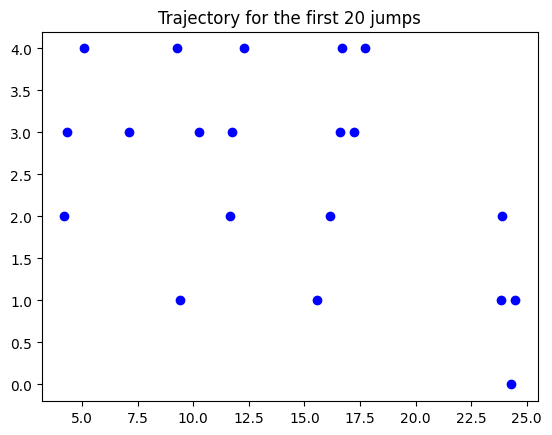

In [11]:
#c
#we initalize the variable used to keep track of the particle movements as well as when the occur
n_steps = 100000
pos = np.zeros(n_steps, dtype=int)
#we define the time of the next movement
transition_times = np.zeros(n_steps)
t_next = -np.log(np.random.rand())/w[0]
#we set this variable to False at first as the particle has never benn in o yet
been_in_o = False
arrive_time = []
for i in range(0,n_steps):
    #choose the next state randomly according to P
    pos[i] = np.random.choice(nstates, p=P[pos[i-1],:])
    #save total time elapsed from the start of the simulation
    transition_times[i] = transition_times[i-1] + t_next
    t_next = -np.log(np.random.rand())/w[pos[i]]
    #if the particle has not been in o since the last d AND is in o we can start to count the time
    #that it will take for the pareticle to arrive to d (we use the variable start_time for this)
    if pos[i] == 0 and not been_in_o:
        been_in_o = True
        start_time = transition_times[i]
    #if the particle has been in o AND is in d we can stop to count the time
    if pos[i] == 4 and been_in_o:
        been_in_o = False
        #the last transition_times minus start_time is the time hitting time
        arrive_time.append(transition_times[i] - start_time)



average_time = sum(arrive_time)/len(arrive_time)
print("The simulated hitting time is =", average_time)


plt.plot(transition_times[0:20], pos[0:20], 'bo')
plt.title('Trajectory for the first 20 jumps')

In [12]:
#1d
P_cap = np.delete(P, 4, 1)
P_cap = np.delete(P_cap, 4, 0)
I1 =  np.ones(4)
I = np.diag(np.ones(4))
w_cap = w[0:4]
v = np.linalg.inv(I-P_cap)@(I1/w_cap)
print("The theoretical hitting time is =", v[0])


The theoretical hitting time is = 8.785714285714285


In [13]:
#1e simulation
t = 0
n_steps = 100000
cont_n_convergence = 0
rng = np.random.default_rng()
random_array = rng.integers(100, size=5)*np.random.rand(5)
x0e = np.random.rand(5)*random_array #initial condition
x = x0e
for i in range(0, n_steps):
    x = P @ x
    t=t+1

print("Initial opinions =",x0e)
print("Simulation Values obtained by applying the French-De Groot dynamics ==", x)

Initial opinions = [ 0.90391105  1.08045978 38.93492871 16.21481178 10.74920055]
Simulation Values obtained by applying the French-De Groot dynamics == [16.5621225 16.5621225 16.5621225 16.5621225 16.5621225]


In [14]:
#theorical
#compute pi
w,v = np.linalg.eig(P.T)
# selects the eigenvalue 1 and print the eigenvector
for index in [i for i in range(nstates) if np.isclose(w[i],1)]:
    pi = v[:,index].real
    pi = pi/np.sum(pi)

#we implement the formulas above defining the vector 1
I1 =  np.ones(5)
alpha = pi*x
value_consensus = alpha@I1
print("The theoretical consensus value is", value_consensus)

The theoretical consensus value is 16.5621224961385


In [15]:
rng = np.random.default_rng()
random_array = rng.integers(100)*np.random.rand()
b = np.random.rand()*random_array
a=0
var = (1/12)*np.power((a-b),2)
mu = 1/2*(a+b)
n_steps = 1200
differences = np.zeros(n_steps)
errors = np.zeros(1200)
#we simulate 1200 times the variance
for i in range(n_steps):
  #initial condition
    x0 = np.random.uniform(a,b,5)
    x = x0
  #we compute each variance with a simulation of 500 steps
    for e in range(500):
     x = P@x
  #we get the squared differences between the value it converged to and the true value mu.
    errors[i] = (np.mean(x) - mu)**2

print("Theoretical variance of the consensus value =", var*np.sum(np.power(pi,2)))
print("Variance of the consensus value obtained =", np.mean(errors))

Theoretical variance of the consensus value = 0.4906619290495469
Variance of the consensus value obtained = 0.5100549867096508


In [16]:
Lambda = np.array([[0,2/5,1/5,0,0],[0,0,3/4,1/4,0],[1/2,0,0,1/2,0],[0,0,1/3,0,2/3],
                 [0,1/3,0,1/3,0]])
def removeEdge(node1,node2,Lambda): #method to remove an edge between node1 and node2 from the rate matrix Lambda
    Lambda[node1,node2] = 0
    return Lambda
Lambda_g = Lambda.copy()
Lambda_g = removeEdge(4,1,Lambda_g) #to remove edge (d,a)
Lambda_g = removeEdge(4,3,Lambda_g) #to remove edge (d,c)
Lambda_g[4,4] = 1 #to apply the French-De Groot dynamics it is necessary to add a selfloop to node d, in order also to obtain matrix P_g
Lambda_g
w_g = np.sum(Lambda_g,axis=1)
D_g = np.diag(w_g)
P_g =np.linalg.inv(D_g) @ Lambda_g
nstates = len(w_g)
print(nstates)
Lambda_g

5


array([[0.        , 0.4       , 0.2       , 0.        , 0.        ],
       [0.        , 0.        , 0.75      , 0.25      , 0.        ],
       [0.5       , 0.        , 0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.66666667],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [17]:
np.set_printoptions()
rng = np.random.default_rng()
random_array = rng.integers(100, size=5)*np.random.rand(5) #to obtain a random array
x0g = np.random.rand(5)*random_array #to obtain the initial state
xg = x0g # set the initial opinion
for i in range(10000): #cycle for to simulate the French-De Groot dynamics
    xg=P_g@xg

eigenvalues,eigenvectors = np.linalg.eig(P_g.T)
for i in [j for j in range(nstates) if np.isclose(eigenvalues[j],1)]: #cycle for to compute the vector pi
    pi = eigenvectors[:,i].real
    pi = pi/np.sum(pi)
    print("pi = ",pi)

consensusValue = pi@x0g
print("Initial opinions =",x0g)
print("Theoretical consensus Value =", consensusValue)
print("Simulation Values obtained by applying the French-De Groot dynamics =", xg)

pi =  [0. 0. 0. 0. 1.]
Initial opinions = [ 2.50708542  5.84609678  1.30330294  0.34788261 18.21978287]
Theoretical consensus Value = 18.219782867482735
Simulation Values obtained by applying the French-De Groot dynamics = [18.21978287 18.21978287 18.21978287 18.21978287 18.21978287]


In [18]:
rng = np.random.default_rng()
random_array = rng.integers(100)*np.random.rand()
b = np.random.rand()*random_array #b is the upper limit of the uniform distribution. It is obtained randomly
a=0 #a is the lower bound of the uniform distribution. It is set equal to 0
var = (1/12)*np.power((a-b),2) #formula to obtain the variance of the uniform distribution
mu = 1/2*(a+b) #formula to obtain the mean mu of the uniform distribution
errors = np.zeros(1200)
for i in range(1200):
    x0 = np.random.uniform(a,b,5) #in this way it is possible to obtain a vector of 5 random point that belong to an uniform distribution whose
                                  #bounds are computed before
    x = x0
    for j in range(500): #cycle for to simulate the French-De Groot dynamics
        x = P_g@x
    errors[i] = (np.mean(x)-mu)**2 #errors defined as the quadratic errors


print("Theoretical variance of the consensus value =", var*np.sum(np.power(pi,2)))
print("Variance of the consensus value obtained =" ,np.mean(errors))

Theoretical variance of the consensus value = 0.0018365888530946788
Variance of the consensus value obtained = 0.0017875605335293866


In [19]:
#h
Lambda_h = Lambda.copy()
Lambda_h = removeEdge(3,2,Lambda) #to remove edge (c,b)
Lambda_h = removeEdge(4,1,Lambda) #to remove edge (d,a)
#in this case it is not necessary to add a selfloop
w_h = np.sum(Lambda_h, axis=1)
D_h = np.diag(w_h)
P_h = np.linalg.inv(D_h) @ Lambda_h
nstates = len(w_h)
print(Lambda_h)

[[0.         0.4        0.2        0.         0.        ]
 [0.         0.         0.75       0.25       0.        ]
 [0.5        0.         0.         0.5        0.        ]
 [0.         0.         0.         0.         0.66666667]
 [0.         0.         0.         0.33333333 0.        ]]


In [20]:
rng = np.random.default_rng()
random_array = rng.integers(100, size=5)*np.random.rand(5)  #to obtain a random array
x0h = np.random.rand(5)*random_array #to obtain the initial state
xh = x0h #set the initial opinion
for n in range(500): #cycle for to simulate the French-De Groot dynamics
    xh = P_h @ xh
print(xh)


[18.19565948 17.38374211 24.69099843  8.45265105 29.56250265]


In [21]:
eigenvalues,eigenvectors = np.linalg.eig(P_h.T)
for i in [j for j in range(nstates) if np.isclose(eigenvalues[j],1)]: #cycle for to compute the vector pi
    pih = eigenvectors[:,i].real
    pih = pi/np.sum(pih)
    print("pi = ",pih)
consensusValue = pih@x0h
print("Consensus Value =", consensusValue)
print("Simulation Values obtained by applying the French-De Groot dynamics =", xh)
print("Simulation Values should converge to the Consensus Value. By the result obtained, we can say they do NOT converge.")

pi =  [0.         0.         0.         0.         0.70710678]
Consensus Value = 20.90384609276818
Simulation Values obtained by applying the French-De Groot dynamics = [18.19565948 17.38374211 24.69099843  8.45265105 29.56250265]
Simulation Values should converge to the Consensus Value. By the result obtained, we can say they do NOT converge.


In [22]:
rng = np.random.default_rng()
random_array = rng.integers(100)*np.random.rand()  #to obtain a random array
b = np.random.rand()*random_array  #b is the upper limit of the uniform distribution. It is obtained randomly
a=0 #a is the lower bound of the uniform distribution. It is set equal to 0
var = (1/12)*np.power((a-b),2)  #formula to obtain the variance of the uniform distribution
mu = 1/2*(a+b) #formula to obtain the mean mu of the uniform distribution
errors = np.zeros(1200)
for i in range(1200):
    x0 = np.random.uniform(a,b,5) #in this way it is possible to obtain a vector of 5 random point that belong to an uniform distribution whose
                                  #bounds are computed before
    x = x0
    for j in range(500):  #cycle for to simulate the French-De Groot dynamics
        x = P_h@x
    errors[i] = (np.mean(x)-mu)**2 #errors defined as the quadratic errors

print("Theoretical variance of the consensus value =", var*np.sum(np.power(pih,2)))
print("Variance of the consensus value obtained =" ,np.mean(errors))

Theoretical variance of the consensus value = 4.07304030698847
Variance of the consensus value obtained = 4.095510064144646


In [23]:
#ex2a
Lambda = np.array([[0,2/5,1/5,0,0],[0,0,3/4,1/4,0],[1/2,0,0,1/2,0],[0,0,1/3,0,2/3], #rate matrix Lambda
                 [0,1/3,0,1/3,0]])
w = np.sum(Lambda, axis=1)
D = np.diag(w)
P = np.linalg.inv(D)@Lambda
nstates = len(w)
w_star = np.max(w)
P_bar = Lambda/w_star
#add the diagonal part
P_bar = P_bar + np.diag(np.ones(len(w))-np.sum(P_bar,axis=1))

values,vectors = np.linalg.eig(P_bar.T)
index = np.argmax(values.real)
pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)
P_bar

array([[0.4       , 0.4       , 0.2       , 0.        , 0.        ],
       [0.        , 0.        , 0.75      , 0.25      , 0.        ],
       [0.5       , 0.        , 0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.66666667],
       [0.        , 0.33333333, 0.        , 0.33333333, 0.33333333]])

In [24]:
def getAverageTime(node1,simulations):
    tot_time = 0

    for i in range(simulations):
        positions = node1*np.ones(100,dtype=np.int32)
        return_times = np.zeros(100)
        movements = np.zeros(100)
        number = 0
        cum_time = 0
        while number<100:
            t_next = -np.log(np.random.rand())/100
            cum_time = cum_time + t_next
            pos = np.random.randint(0,100)
            positions[pos] = np.random.choice(np.arange(nstates), p = P_bar[positions[pos]])
            if movements[pos] == 0 and positions[pos] != node1 :
                movements[pos] = 1
            if movements[pos] == 1 and positions[pos] == node1 and return_times[pos] == 0:
                return_times[pos] = cum_time
                number +=1

        avg_time=np.average(return_times)
        tot_time = tot_time + avg_time

    print(tot_time/simulations)
getAverageTime(1,1000)

6.748670850719922


In [25]:
def getNumberParticlesPlot(node1,simulations):
    tot_particles = np.zeros(5,dtype=np.int32)
    counter = 0
    t_times = np.zeros(10000)
    particles_time = np.zeros((5,10000), dtype=np.int32)
    for i in range(simulations):
        node1 = 0
        particles = np.zeros(5, dtype=np.int32)
        particles[node1] = 100
        tot_time = 0

        while tot_time<60:
            if i==0:
                particles_time[:,counter] = particles
            t_next = -np.log(np.random.rand())/100
            tot_time += t_next
            if i==0:
                t_times[counter] = tot_time
                counter += 1
            source_node = np.random.choice(np.arange(nstates),p=particles/np.sum(particles))
            next_node = np.random.choice(np.arange(nstates), p=P_bar[source_node])
            particles[source_node] -=1
            particles[next_node] +=1


        tot_particles = tot_particles + particles
    print(tot_particles/simulations)
    fig,ax = plt.subplots(figsize=(8,8))
    vertices_names = {0:'o',1:'a',2:'b',3:'c',4:'d'}
    for i in range(nstates):
        v = str(vertices_names[i])
        ax.plot(t_times[:counter], particles_time[i,:counter], label=v)
        ax.legend(fontsize=8)
        ax.set_xlabel('Time', fontsize=10)
        ax.set_ylabel('Particles', fontsize=10)
    return tot_particles/simulations

[18.613 14.699 22.006 22.43  22.252]


array([18.613, 14.699, 22.006, 22.43 , 22.252])

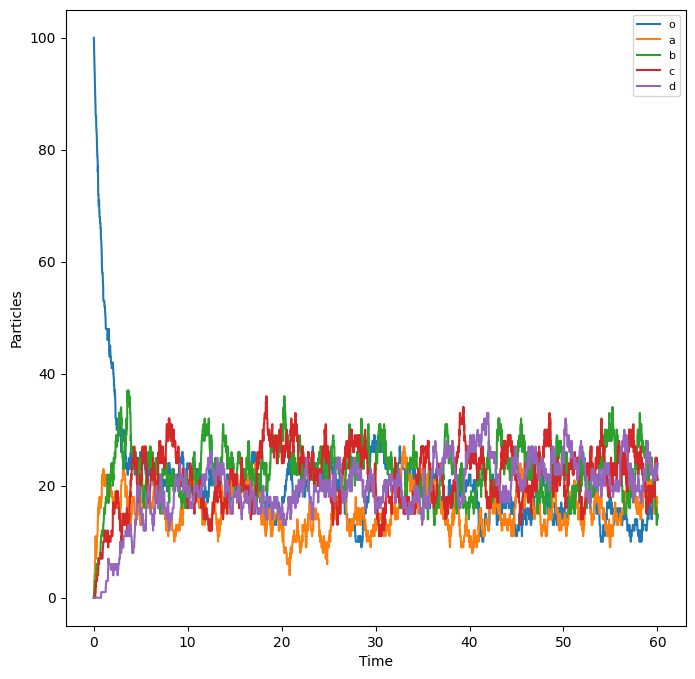

In [26]:
getNumberParticlesPlot(0,1000)


**********
Problem3
**********


Vector w:
 [1.125 1.    1.    1.    0.   ]

Matrix D:
 [[0.6        0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.66666667]]

Matrix P:
 [[0.         0.66666667 0.33333333 0.         0.        ]
 [0.         0.         0.75       0.25       0.        ]
 [0.5        0.         0.         0.5        0.        ]
 [0.         0.         0.33333333 0.         0.66666667]
 [0.         0.5        0.         0.5        0.        ]]

Matrix Q:
 [[0.         0.66666667 0.33333333 0.         0.        ]
 [0.         0.11111111 0.22222222 0.22222222 0.44444444]
 [0.         0.         0.11111111 0.88888889 0.        ]
 [0.         0.         0.         0.11111111 0.88888889]
 [0.         0.         0.         0.         1.        ]]

Matrix Q_cum:

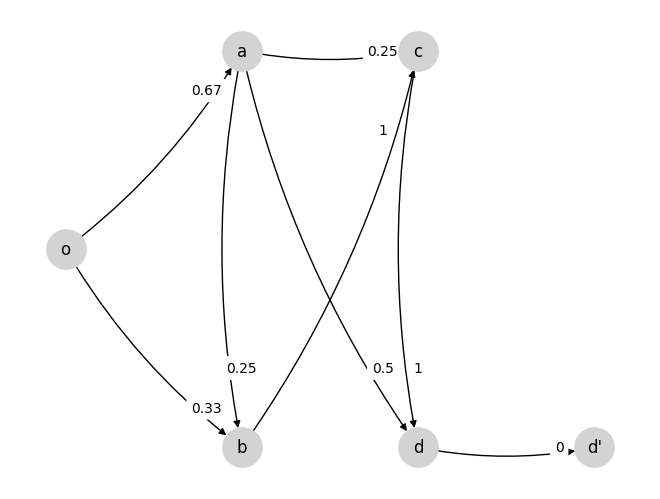

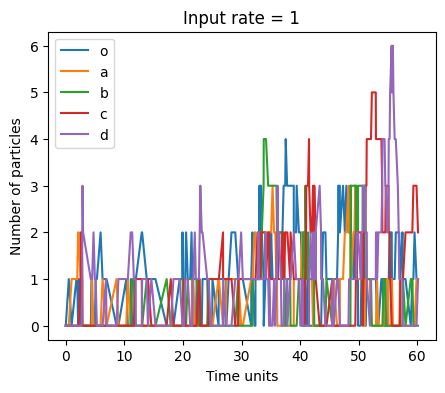

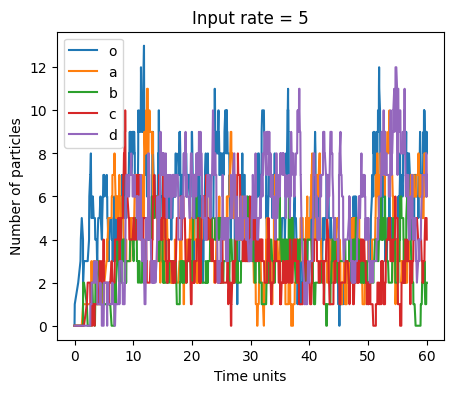

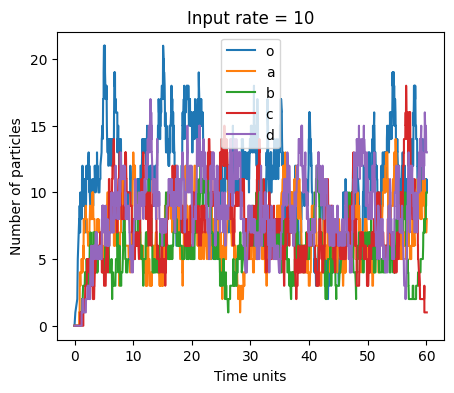

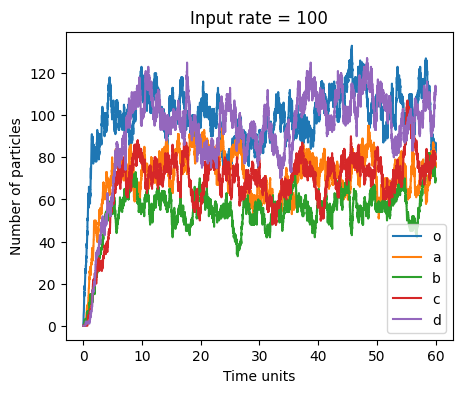

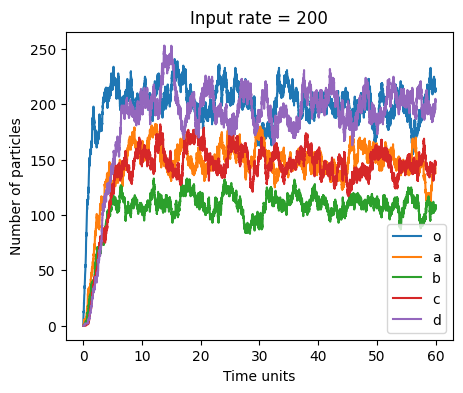

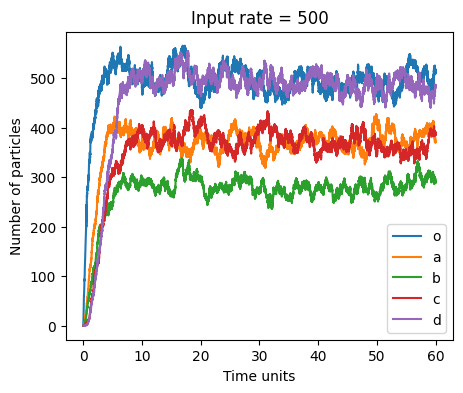

In [27]:
print("\n**********\nProblem3\n**********\n")
# draw graph
G = nx.DiGraph()
G.add_nodes_from(['o', 'a', 'b', 'c', 'd', "d'"])
G.add_weighted_edges_from([('o', 'a', float("{0:.2f}".format(2 / 3))), ('o', 'b', float("{0:.2f}".format(1 / 3))),
                           ('a', 'b', float("{0:.2f}".format(1 / 4))), ('a', 'c', float("{0:.2f}".format(1 / 4))),
                           ('a', 'd', float("{0:.2f}".format(2 / 4))), ('b', 'c', 1), ('c', 'd', 1), ('d', "d'", 0)])
pos = nx.spring_layout(G)
pos = {'o': (0, 0), 'a': (1, 2), 'b': (1, -2), 'c': (2, 2), 'd': (2, -2), "d'": (3, -2)}
nx.draw(G, pos=pos, with_labels=True, node_size=800, font_size=12, node_color='lightgray',
        connectionstyle='arc3, rad = 0.1')
labels = {e: G.edges[e]['weight'] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.20, rotate=False, horizontalalignment='center')

lambda_matrix = [[0, 3/4, 3/8, 0,   0],
                 [0, 0, 1/4, 1/4, 2/4],
                 [0, 0,   0,   1,   0],
                 [0, 0,   0,   0,   1],
                 [0, 0,   0,   0,   0],
                 ]
w = np.sum(lambda_matrix, axis=1)

G_nodes = len(G.nodes)

w_star = np.max(w)
Q = lambda_matrix / w_star
Q = Q + np.diag(np.ones(len(w)) - np.sum(Q, axis=1))
Q_cum = np.cumsum(Q, axis=1)

#print("Number of nodes: ", n_nodes)
print("\nVector w:\n", w)
print("\nMatrix D:\n", D)
print("\nMatrix P:\n", P)
#print("\nMatrix P_cum:\n", P_cum)
print("\nMatrix Q:\n", Q)
print("\nMatrix Q_cum:\n", Q_cum)


def get_starting_node(node_particles, rate):
    particles = rate

    # 1 dummy variable for entry in node 'o'
    # Particles in nodes
    n_nodes = np.zeros(G_nodes)
    n_nodes[5] = rate

    particles += np.sum(node_particles)

    for i in range(G_nodes - 1):
        n_nodes[i] = node_particles[i]

    particles_cum = np.cumsum(n_nodes) / particles
    start_node = np.argwhere(particles_cum > np.random.rand())[0][0]
    # print(start_node)

    return start_node, particles


def simulate_proportional_rate(time_units, rate):
    # particles in node
    node_particles = np.zeros(G_nodes - 1)

    transition_times = []
    transition_times.append(0)

    hist_nodes = np.array([[0, 0, 0, 0, 0]])

    while True:

        start_node, particles = get_starting_node(node_particles, rate)
        t_next = transition_times[-1] - np.log(np.random.rand()) / particles

        # check dummy variable
        if start_node == 5:
            node_particles[0] += 1

        elif start_node == 4:
            node_particles[4] -= 1

        else:
            end_node = np.argwhere(Q_cum[start_node] > np.random.rand())[0][0]
            node_particles[start_node] -= 1
            node_particles[end_node] += 1

        transition_times.append(t_next)

        hist_nodes = np.concatenate((hist_nodes, [node_particles]), axis=0)

        if t_next > time_units:
            break

    return hist_nodes, transition_times

def plot_proportional_trajectories(transition_times, hist_nodes, input_rate):
    fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
    labels = {0: 'o', 1: 'a', 2: 'b', 3: 'c', 4: 'd'}
    for i in range(G_nodes - 1):  # only 5 nodes, excluding d'
        ax.plot(transition_times, hist_nodes[:, i], label=labels[i])

    ax.legend()
    plt.xlabel("Time units")
    plt.ylabel("Number of particles")
    plt.title("Input rate = {}".format(input_rate))
    plt.savefig("ParticlesProportionalRate" + str(input_rate) + ".svg")
    plt.show()
    plt.close()


input_rates = [1, 5, 10, 100, 200,500]
time_units = 60
for input_rate in input_rates:
    hist_nodes, transition_times = simulate_proportional_rate(time_units, input_rate)
    plot_proportional_trajectories(transition_times, hist_nodes, input_rate)

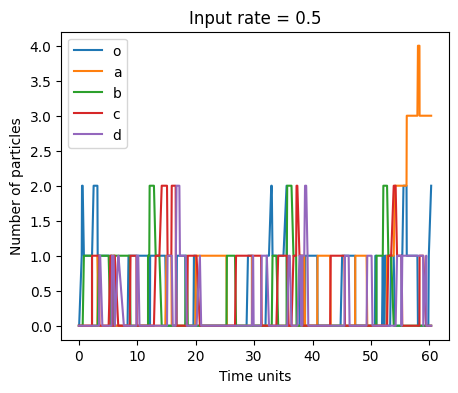

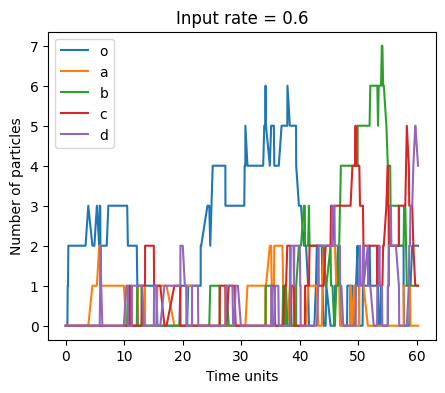

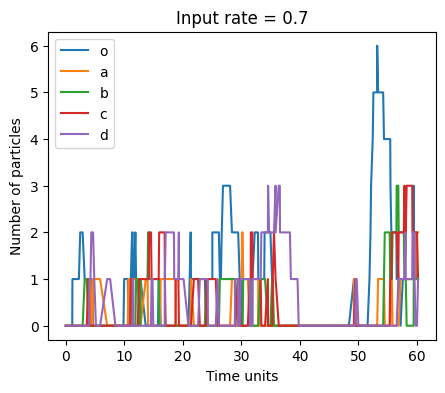

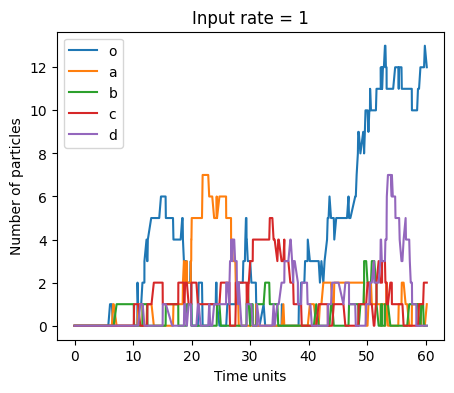

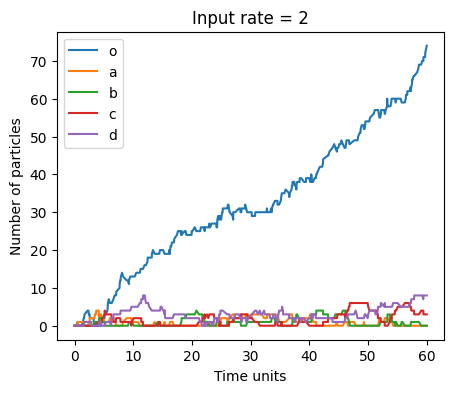

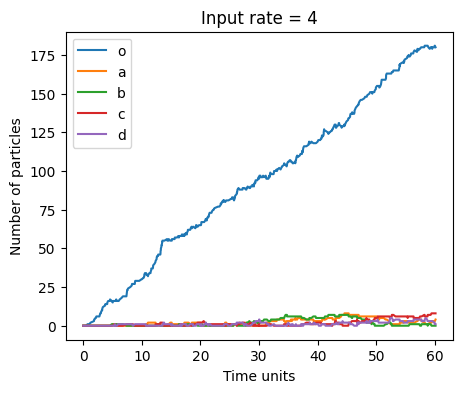

In [28]:
# problem 3 : B
def get_starting_node(rate):
    total_rate = rate

    # 1 dummy variable for entry in node 'o'
    n_nodes = np.zeros(G_nodes)
    n_nodes[5] = rate

    for i in range(G_nodes - 1):
        n_nodes[i] = 1
        total_rate += 1

    particles_cum = np.cumsum(n_nodes) / total_rate
    start_node = np.argwhere(particles_cum > np.random.rand())[0][0]

    return start_node, total_rate


def simulate_fixed_rate(time_units, rate):
    node_particles = np.zeros(G_nodes - 1)

    transition_times = []
    transition_times.append(0)

    hist_nodes = np.array([[0, 0, 0, 0, 0]])

    while True:

        start_node, total_rate = get_starting_node(rate)
        t_next = transition_times[-1] - np.log(np.random.rand()) / total_rate

        # check dummy variable
        if start_node == 5:
            node_particles[0] += 1

        elif node_particles[start_node] == 0:
            # Do nothing if I don't have any particle
            # Check after if start_nod == 5 but before start_node == 4.
            pass
        elif start_node == 4:
            node_particles[4] -= 1

        else:
            end_node = np.argwhere(Q_cum[start_node] > np.random.rand())[0][0]
            node_particles[start_node] -= 1
            node_particles[end_node] += 1

        transition_times.append(t_next)
        hist_nodes = np.concatenate((hist_nodes, [node_particles]), axis=0)

        if t_next > time_units:
            break

    return hist_nodes, transition_times


def plot_fixed_rate_trajectories(transition_times, hist_nodes, input_rate):
    fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
    labels = {0: 'o', 1: 'a', 2: 'b', 3: 'c', 4: 'd'}
    for i in range(G_nodes - 1):  # only 5 nodes, excluding d'
        ax.plot(transition_times, hist_nodes[:, i], label=labels[i])

    ax.legend()
    plt.xlabel("Time units")
    plt.ylabel("Number of particles")
    plt.title("Input rate = {}".format(input_rate))
    plt.savefig("ParticlesFixedRate" + str(input_rate) + ".svg")
    plt.show()
    plt.close()


input_rates = [0.5, 0.6, 0.7, 1, 2,4]
time_units = 60
for input_rate in input_rates:
    hist_nodes, transition_times = simulate_fixed_rate(time_units, input_rate)
    plot_fixed_rate_trajectories(transition_times, hist_nodes, input_rate)